<a href="https://colab.research.google.com/github/ChiragShetye/Scalar_Walmart/blob/main/Business_Case_Study_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from scipy import stats
from scipy.stats import boxcox

In [ ]:
data = pd.read_csv('/content/walmart_data.csv')

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0


In [ ]:
# Change the data type
clos = ['Occupation','Marital_Status','Product_Category']
data[clos] = data[clos].astype('object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25037 entries, 0 to 25036
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     25037 non-null  int64  
 1   Product_ID                  25037 non-null  object 
 2   Gender                      25036 non-null  object 
 3   Age                         25036 non-null  object 
 4   Occupation                  25036 non-null  object 
 5   City_Category               25036 non-null  object 
 6   Stay_In_Current_City_Years  25036 non-null  object 
 7   Marital_Status              25036 non-null  object 
 8   Product_Category            25036 non-null  object 
 9   Purchase                    25036 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 1.9+ MB


In [ ]:
data.describe()

,User_ID,Purchase
count,2.503700e+04,25036.000000
mean,1.001944e+06,9240.939647
std,1.124044e+03,4937.285195
min,1.000001e+06,186.000000
25%,1.001015e+06,5837.750000
50%,1.001884e+06,8044.000000
75%,1.002952e+06,11997.500000
max,1.003845e+06,23958.000000


In [ ]:
# Change the data type
clos = ['Occupation','Marital_Status','Product_Category']
data[clos] = data[clos].astype('object')

In [ ]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        1
Age                           1
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category              1
Purchase                      1
dtype: int64

In [ ]:
# Assuming 'data' is your DataFrame
categorical_cols = ['Gender','Age','Occupation','Marital_Status','Product_Category','Stay_In_Current_City_Years','City_Category']

# Melt the dataframe
melted_data = data[categorical_cols].melt()

# Compute the proportions
proportions = melted_data.groupby(['variable', 'value']).size() / len(data)

# Reset index for better readability
proportions = proportions.reset_index(name='proportion')

# Display the result
print(proportions)

                      variable  value  proportion
0                          Age   0-17    0.027919
1                          Age  18-25    0.203699
2                          Age  26-35    0.392459
3                          Age  36-45    0.193274
4                          Age  46-50    0.073651
5                          Age  51-55    0.069417
6                          Age    55+    0.039541
7                City_Category      A    0.278388
8                City_Category      B    0.423733
9                City_Category      C    0.297839
10                      Gender      F    0.235531
11                      Gender      M    0.764429
12              Marital_Status    0.0    0.600431
13              Marital_Status    1.0    0.399529
14                  Occupation    0.0    0.124216
15                  Occupation    1.0    0.072812
16                  Occupation    2.0    0.046451
17                  Occupation    3.0    0.035547
18                  Occupation    4.0    0.138435


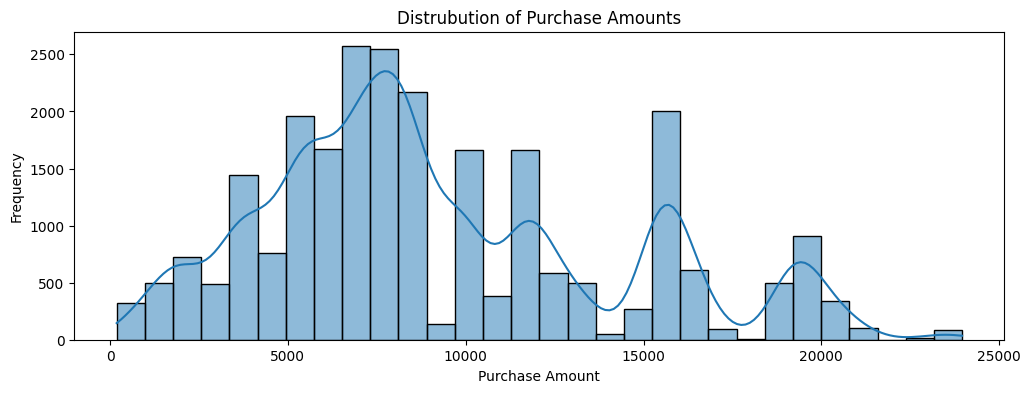

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(data['Purchase'],kde = True,bins=30)
plt.title('Distrubution of Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

In [ ]:
mu = data['Purchase'].mean()
mu

9240.939646908451

In [ ]:
sigma = data['Product_Category'].std()
sigma

3.7057298068470153

In [ ]:
np.mean(data['Product_Category'].sample(5))

7.0

User_ID                       0
Product_ID                    0
Gender                        1
Age                           1
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category              1
Purchase                      1
dtype: int64


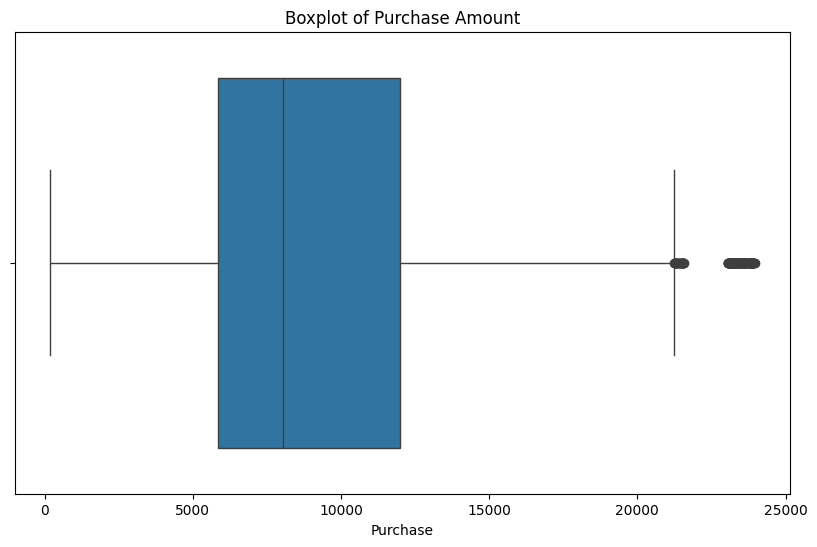

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Boxplot to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Purchase'])
plt.title('Boxplot of Purchase Amount')
plt.show()

Gender
F    8730.292691
M    9398.277287
Name: Purchase, dtype: float64


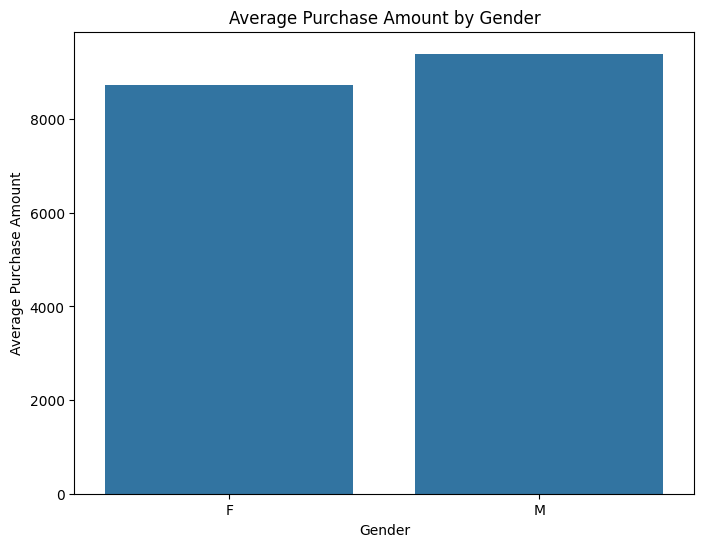

In [ ]:
# Group by Gender and calculate the average purchase amount
gender_spending = data.groupby('Gender')['Purchase'].mean()
print(gender_spending)

# Plot the average spending by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_spending.index, y=gender_spending.values)
plt.title('Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount')
plt.show()

Male: Mean=9398.277287214589, CI=(9327.266110882696, 9469.288463546482)
Female: Mean=8730.292691198914, CI=(8611.573864279373, 8849.011518118456)


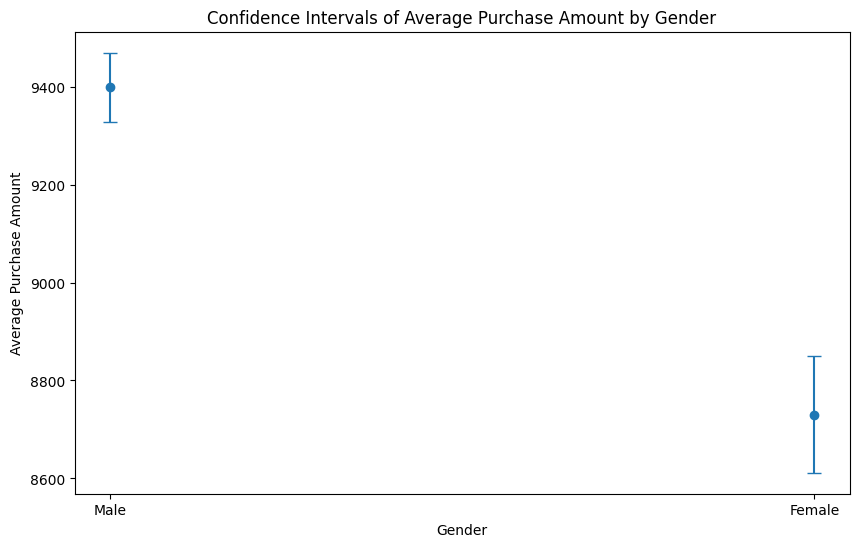

In [ ]:
# Function to calculate confidence interval
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data)  # Standard error of the mean
    interval = sem * stats.t.ppf((1 + confidence) / 2., len(data) - 1)
    return mean, mean - interval, mean + interval

# Calculate confidence intervals for male and female customers
male_data = data[data['Gender'] == 'M']['Purchase']
female_data = data[data['Gender'] == 'F']['Purchase']

male_mean, male_lower, male_upper = confidence_interval(male_data)
female_mean, female_lower, female_upper = confidence_interval(female_data)

print(f"Male: Mean={male_mean}, CI=({male_lower}, {male_upper})")
print(f"Female: Mean={female_mean}, CI=({female_lower}, {female_upper})")

# Plot the confidence intervals
plt.figure(figsize=(10, 6))
plt.errorbar(x=['Male', 'Female'], y=[male_mean, female_mean], yerr=[male_mean - male_lower, female_mean - female_lower], fmt='o', capsize=5)
plt.title('Confidence Intervals of Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount')
plt.show()

Marital_Status
0.0    9209.872281
1.0    9287.629211
Name: Purchase, dtype: float64


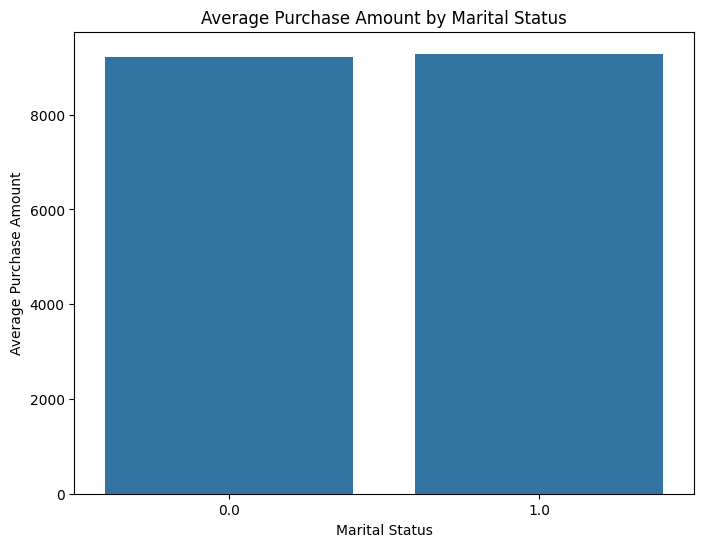

In [ ]:
# Group by Marital Status and calculate the average purchase amount
marital_spending = data.groupby('Marital_Status')['Purchase'].mean()
print(marital_spending)

# Plot the average spending by marital status
plt.figure(figsize=(8, 6))
sns.barplot(x=marital_spending.index, y=marital_spending.values)
plt.title('Average Purchase Amount by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Purchase Amount')
plt.show()


Step 2: Handling Missing Values and Outliers

> Add blockquote

> Add blockquote

> Add blockquote

> Add blockquote

> Add blockquote











User_ID                       0
Product_ID                    0
Gender                        1
Age                           1
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category              1
Purchase                      1
dtype: int64


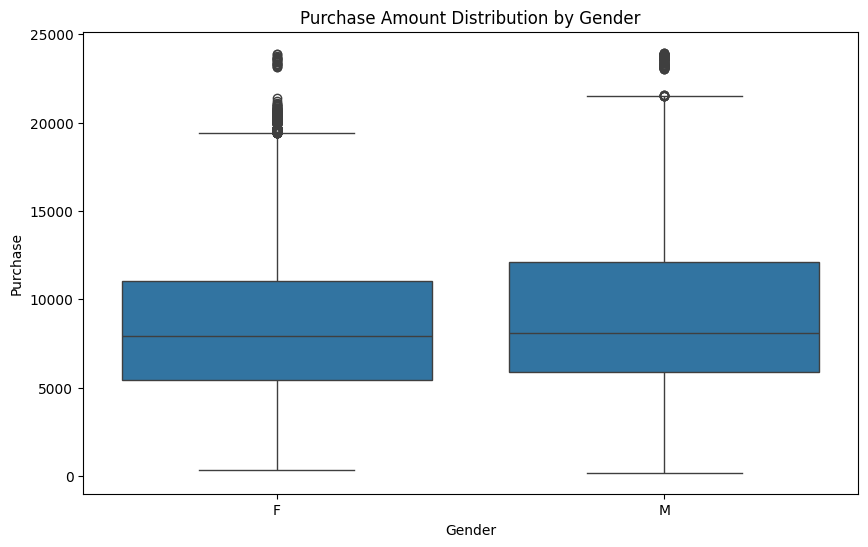

count    25036.000000
mean      9240.939647
std       4937.285195
min        186.000000
25%       5837.750000
50%       8044.000000
75%      11997.500000
max      23958.000000
Name: Purchase, dtype: float64


In [ ]:
# Check for missing values
print(data.isnull().sum())

# Drop missing values if any
data = data.dropna()

# Detect outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Purchase', data=data)
plt.title('Purchase Amount Distribution by Gender')
plt.show()

# Describe statistics for Purchase amount
print(data['Purchase'].describe())

Gender-based Purchase Analysis


Gender
M    19139
F     5897
Name: count, dtype: int64
Gender
F    8730.292691
M    9398.277287
Name: Purchase, dtype: float64


<ipython-input-32-9dbcc3d6fcc3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')


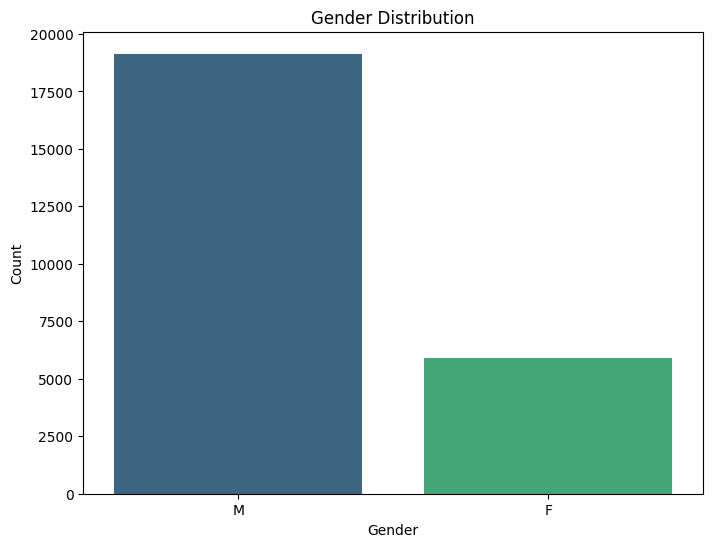

In [ ]:
# Gender distribution
gender_counts = data['Gender'].value_counts()
print(gender_counts)

# Average Purchase by Gender
avg_purchase_by_gender = data.groupby('Gender')['Purchase'].mean()
print(avg_purchase_by_gender)

# Bar chart for Gender distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

[link text](https://)Step 4: Hypothesis Testing and Confidence Intervals


In [ ]:
# Hypothesis Testing: Do women spend more on Black Friday than men?
male_purchase = data[data['Gender'] == 'M']['Purchase']
female_purchase = data[data['Gender'] == 'F']['Purchase']

t_stat, p_val = stats.ttest_ind(male_purchase, female_purchase)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

# Confidence Interval Calculation
sample_size = 1000
male_sample = male_purchase.sample(sample_size)
female_sample = female_purchase.sample(sample_size)

male_mean = np.mean(male_sample)
female_mean = np.mean(female_sample)
male_std = np.std(male_sample)
female_std = np.std(female_sample)

confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)

male_margin_error = z_score * (male_std / np.sqrt(sample_size))
female_margin_error = z_score * (female_std / np.sqrt(sample_size))

male_confidence_interval = (male_mean - male_margin_error, male_mean + male_margin_error)
female_confidence_interval = (female_mean - female_margin_error, female_mean + female_margin_error)

print(f"Male Confidence Interval: {male_confidence_interval}")
print(f"Female Confidence Interval: {female_confidence_interval}")

T-statistic: 9.098696612568355, P-value: 9.804470636723891e-20
Male Confidence Interval: (9052.927578734969, 9683.10442126503)
Female Confidence Interval: (8234.810801202126, 8801.495198797875)


Step 5: Additional Analysis for Marital Status and Age

*   List item
*   List item




Marital_Status
0.0    9209.872281
1.0    9287.629211
Name: Purchase, dtype: float64
Age
0-17     8973.606581
18-25    9159.605686
26-35    9251.373194
36-45    9257.016326
46-50    9286.909436
51-55    9459.326812
55+      9197.534343
Name: Purchase, dtype: float64


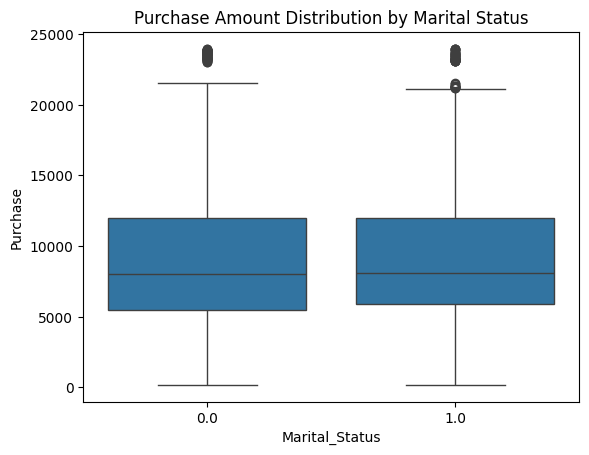

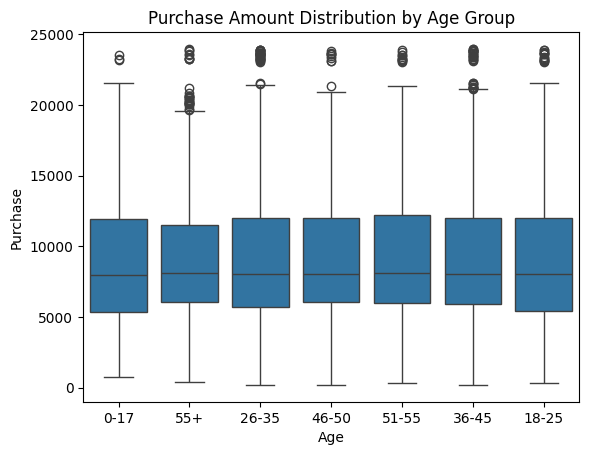

In [ ]:
# Marital Status Analysis
marital_avg_purchase = data.groupby('Marital_Status')['Purchase'].mean()
print(marital_avg_purchase)

# Age Group Analysis
age_avg_purchase = data.groupby('Age')['Purchase'].mean()
print(age_avg_purchase)

# Visualization
sns.boxplot(x='Marital_Status', y='Purchase', data=data)
plt.title('Purchase Amount Distribution by Marital Status')
plt.show()

sns.boxplot(x='Age', y='Purchase', data=data)
plt.title('Purchase Amount Distribution by Age Group')
plt.show()

Tracking the Amount Spent per Transaction by Gender


In [ ]:
# Separate data by gender
male_data = data[data['Gender'] == 'M']
female_data = data[data['Gender'] == 'F']

# Calculate average purchase amount for males and females
male_avg_purchase = male_data['Purchase'].mean()
female_avg_purchase = female_data['Purchase'].mean()

print(f"Average Purchase Amount for Males: {male_avg_purchase}")
print(f"Average Purchase Amount for Females: {female_avg_purchase}")

Average Purchase Amount for Males: 9398.277287214589
Average Purchase Amount for Females: 8730.292691198914


Using CLT, we can estimate the confidence interval for the population mean purchase amount based on sample data.



In [ ]:
import numpy as np
import scipy.stats as stats

def compute_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = stats.sem(data)
    h = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
    return mean, mean - h, mean + h

# Compute confidence intervals for male and female purchases
male_ci = compute_confidence_interval(male_data['Purchase'])
female_ci = compute_confidence_interval(female_data['Purchase'])

print(f"Male Purchase Confidence Interval: {male_ci}")
print(f"Female Purchase Confidence Interval: {female_ci}")

Male Purchase Confidence Interval: (9398.277287214589, 9327.266110882696, 9469.288463546482)
Female Purchase Confidence Interval: (8730.292691198914, 8611.573864279373, 8849.011518118456)


We can perform similar analysis for marital status and different age groups.



In [ ]:
# Analysis for Marital Status
married_data = data[data['Marital_Status'] == 1]
unmarried_data = data[data['Marital_Status'] == 0]

married_avg_purchase = married_data['Purchase'].mean()
unmarried_avg_purchase = unmarried_data['Purchase'].mean()

married_ci = compute_confidence_interval(married_data['Purchase'])
unmarried_ci = compute_confidence_interval(unmarried_data['Purchase'])

print(f"Married Purchase Confidence Interval: {married_ci}")
print(f"Unmarried Purchase Confidence Interval: {unmarried_ci}")

# Analysis for Age Groups
age_groups = data['Age'].unique()

for age_group in age_groups:
    age_data = data[data['Age'] == age_group]
    age_avg_purchase = age_data['Purchase'].mean()
    age_ci = compute_confidence_interval(age_data['Purchase'])
    print(f"Age Group {age_group} Purchase Confidence Interval: {age_ci}")

Married Purchase Confidence Interval: (9287.629211236628, 9191.714946370472, 9383.543476102785)
Unmarried Purchase Confidence Interval: (9209.87228098184, 9130.483388930872, 9289.261173032806)
Age Group 0-17 Purchase Confidence Interval: (8973.606580829757, 8600.099595197627, 9347.113566461887)
Age Group 55+ Purchase Confidence Interval: (9197.534343434343, 8905.380139917557, 9489.688546951129)
Age Group 26-35 Purchase Confidence Interval: (9251.373193568084, 9153.357224670664, 9349.389162465504)
Age Group 46-50 Purchase Confidence Interval: (9286.909436008676, 9069.577834375146, 9504.241037642207)
Age Group 51-55 Purchase Confidence Interval: (9459.326812428078, 9222.382430162383, 9696.271194693774)
Age Group 36-45 Purchase Confidence Interval: (9257.016325687126, 9118.605857221743, 9395.426794152509)
Age Group 18-25 Purchase Confidence Interval: (9159.60568627451, 9022.671445531078, 9296.539927017942)


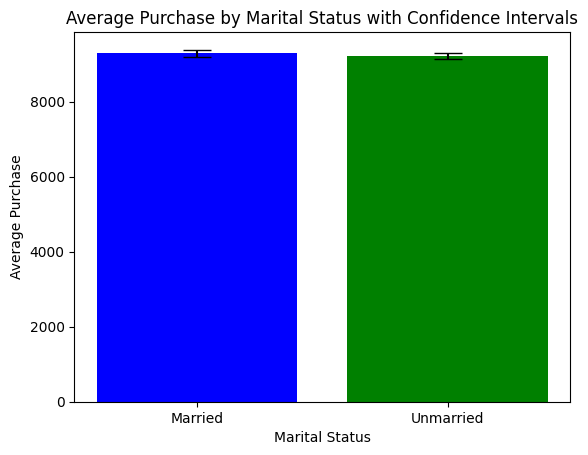

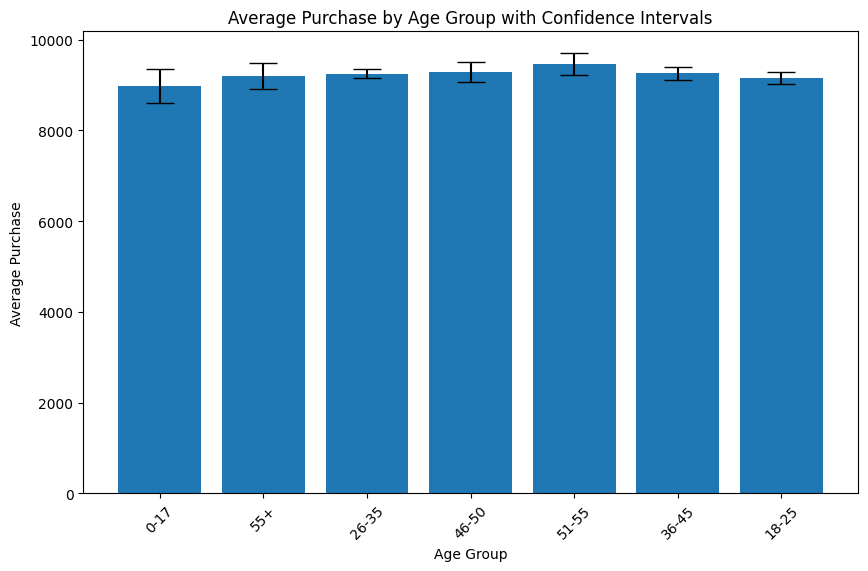

In [ ]:
# Analysis for Marital Status
married_data = data[data['Marital_Status'] == 1]
unmarried_data = data[data['Marital_Status'] == 0]

married_avg_purchase, married_ci_lower, married_ci_upper = compute_confidence_interval(married_data['Purchase'])
unmarried_avg_purchase, unmarried_ci_lower, unmarried_ci_upper = compute_confidence_interval(unmarried_data['Purchase'])

# Plot for Marital Status
fig, ax = plt.subplots()
marital_status_labels = ['Married', 'Unmarried']
marital_status_means = [married_avg_purchase, unmarried_avg_purchase]
marital_status_ci_lowers = [married_avg_purchase - married_ci_lower, unmarried_avg_purchase - unmarried_ci_lower]
marital_status_ci_uppers = [married_ci_upper - married_avg_purchase, unmarried_ci_upper - unmarried_avg_purchase]

ax.bar(marital_status_labels, marital_status_means, yerr=[marital_status_ci_lowers, marital_status_ci_uppers], capsize=10, color=['blue', 'green'])
ax.set_xlabel('Marital Status')
ax.set_ylabel('Average Purchase')
ax.set_title('Average Purchase by Marital Status with Confidence Intervals')
plt.show()

# Analysis for Age Groups
age_groups = data['Age'].unique()
age_group_labels = []
age_group_means = []
age_group_ci_lowers = []
age_group_ci_uppers = []

for age_group in age_groups:
    age_data = data[data['Age'] == age_group]
    age_avg_purchase, age_ci_lower, age_ci_upper = compute_confidence_interval(age_data['Purchase'])

    age_group_labels.append(age_group)
    age_group_means.append(age_avg_purchase)
    age_group_ci_lowers.append(age_avg_purchase - age_ci_lower)
    age_group_ci_uppers.append(age_ci_upper - age_avg_purchase)

# Plot for Age Groups
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(age_group_labels, age_group_means, yerr=[age_group_ci_lowers, age_group_ci_uppers], capsize=10)
ax.set_xlabel('Age Group')
ax.set_ylabel('Average Purchase')
ax.set_title('Average Purchase by Age Group with Confidence Intervals')
plt.xticks(rotation=45)
plt.show()

1. Poisson Distribution Analysis


Min Purchase: 186.0
Max Purchase: 23958.0


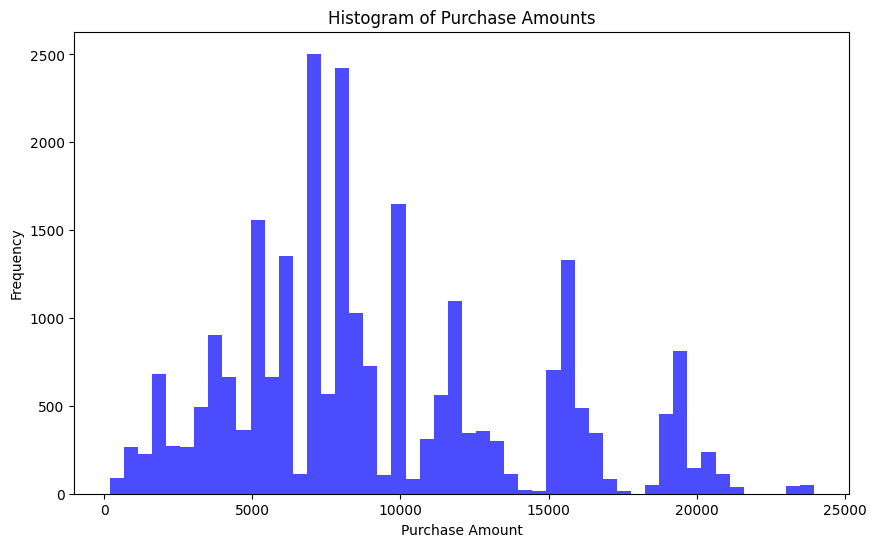

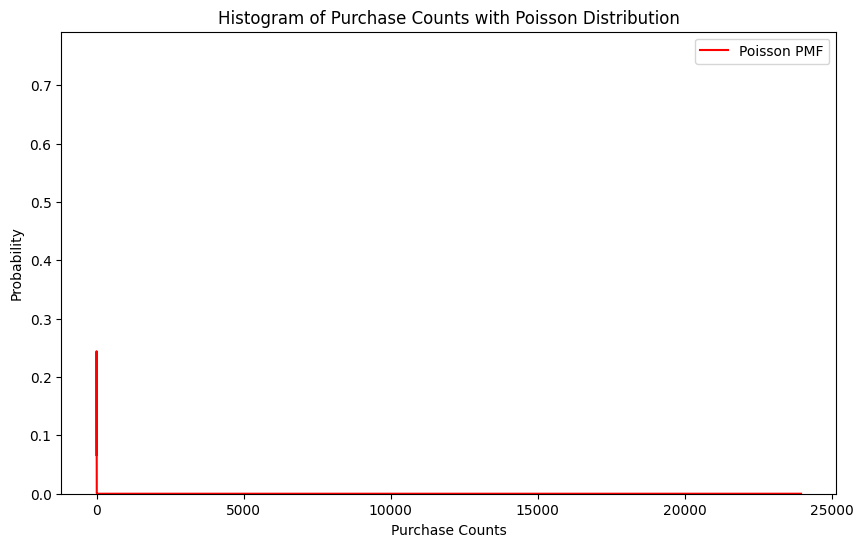

In [ ]:
# Check the range of purchase amounts
print(f"Min Purchase: {data['Purchase'].min()}")
print(f"Max Purchase: {data['Purchase'].max()}")

# Plot the histogram of purchase amounts
plt.figure(figsize=(10, 6))
plt.hist(data['Purchase'], bins=50, alpha=0.7, color='blue')
plt.title('Histogram of Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

# Since Purchase amounts are not counts, we cannot directly use Poisson here.
# But let's explore the Purchase counts at specific intervals to approximate Poisson-like behavior
purchase_counts = data['Purchase'].value_counts()

# Fitting Poisson distribution
mu = purchase_counts.mean()
poisson_dist = stats.poisson(mu)

# Plot the Poisson distribution against the histogram of purchase counts
x = np.arange(0, max(purchase_counts.index))
plt.figure(figsize=(10, 6))
plt.hist(purchase_counts, bins=30, alpha=0.7, color='blue', density=True)
plt.plot(x, poisson_dist.pmf(x), 'r-', label='Poisson PMF')
plt.title('Histogram of Purchase Counts with Poisson Distribution')
plt.xlabel('Purchase Counts')
plt.ylabel('Probability')
plt.legend()
plt.show()

Box-Cox Transformation : The Box-Cox transformation is useful for stabilizing variance and making data more normally distributed.




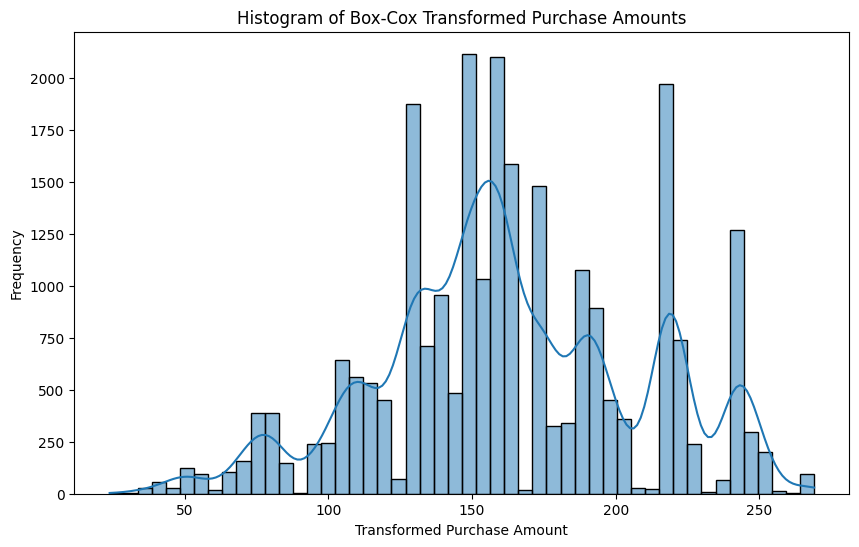

Optimal Lambda for Box-Cox Transformation: 0.48352347935604734


In [ ]:
# Applying Box-Cox transformation
purchase_positive = data['Purchase'] + 1  # Ensure all values are positive
purchase_boxcox, lambda_ = boxcox(purchase_positive)

# Plot the transformed data
plt.figure(figsize=(10, 6))
sns.histplot(purchase_boxcox, bins=50, kde=True)
plt.title('Histogram of Box-Cox Transformed Purchase Amounts')
plt.xlabel('Transformed Purchase Amount')
plt.ylabel('Frequency')
plt.show()

# Checking the distribution
print(f"Optimal Lambda for Box-Cox Transformation: {lambda_}")

Gaussian (Normal) Distribution Analysis


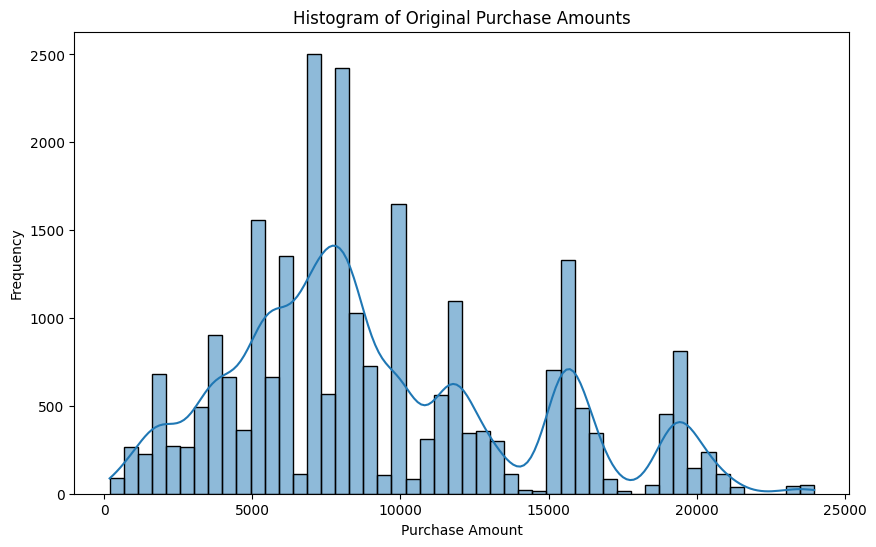

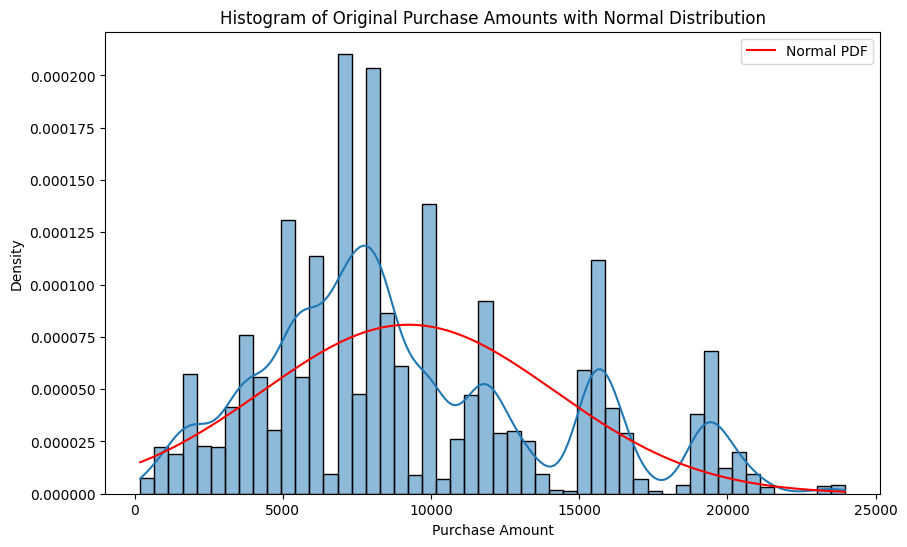

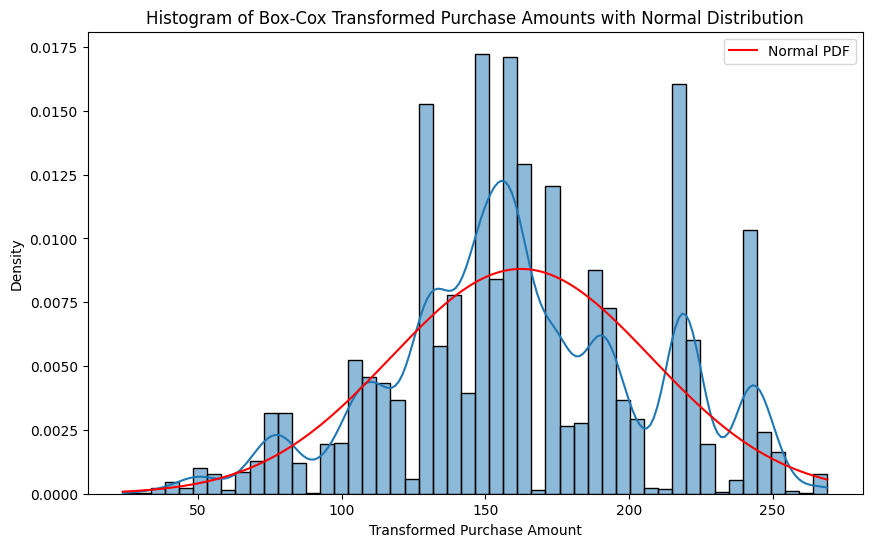

In [ ]:
# Original Purchase Amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['Purchase'], bins=50, kde=True)
plt.title('Histogram of Original Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

# Gaussian (Normal) distribution fitting
mean_purchase = data['Purchase'].mean()
std_purchase = data['Purchase'].std()
norm_dist = stats.norm(mean_purchase, std_purchase)

# Plot the Normal distribution against the histogram of original purchase amounts
x = np.linspace(data['Purchase'].min(), data['Purchase'].max(), 1000)
plt.figure(figsize=(10, 6))
sns.histplot(data['Purchase'], bins=50, kde=True, stat='density')
plt.plot(x, norm_dist.pdf(x), 'r-', label='Normal PDF')
plt.title('Histogram of Original Purchase Amounts with Normal Distribution')
plt.xlabel('Purchase Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

# After Box-Cox Transformation
mean_boxcox = purchase_boxcox.mean()
std_boxcox = purchase_boxcox.std()
norm_dist_boxcox = stats.norm(mean_boxcox, std_boxcox)

# Plot the Normal distribution against the histogram of transformed purchase amounts
x_boxcox = np.linspace(purchase_boxcox.min(), purchase_boxcox.max(), 1000)
plt.figure(figsize=(10, 6))
sns.histplot(purchase_boxcox, bins=50, kde=True, stat='density')
plt.plot(x_boxcox, norm_dist_boxcox.pdf(x_boxcox), 'r-', label='Normal PDF')
plt.title('Histogram of Box-Cox Transformed Purchase Amounts with Normal Distribution')
plt.xlabel('Transformed Purchase Amount')
plt.ylabel('Density')
plt.legend()
plt.show()